# NETFLIX THROUGH THE PANDEMIC

In [1]:
import os
cwd = os.getcwd()
ParentDir=os.path.abspath(os.path.join(cwd, os.pardir))
FunctinDir=ParentDir + "\\Solution\\Functions"
FunctinDir

'D:\\Ali\\BootCamp\\Challenge\\Project_1\\Solution\\Functions'

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
import time

import sys
sys.path.insert(0,FunctinDir)
from Stock_Data import StockData

In [3]:
import os
cwd = os.getcwd()
cwd

'D:\\Ali\\BootCamp\\Challenge\\Project_1\\project1'

In [4]:
# Import the stock and COVID data
stock_raw = StockData("NFLX")
cases_raw = pd.read_csv('daily-covid-cases-deaths.csv',
                       encoding = 'utf-8')
cases_raw = cases_raw.rename(columns={"Day":"Date", 'Daily new confirmed cases of COVID-19': 'New Cases',\
                                      'Daily new confirmed deaths due to COVID-19':'New Deaths'})
cases_raw = cases_raw.loc[cases_raw["Entity"]=="World"]
stock_raw["Date"]=stock_raw["Date"].astype(str)
cutdown= lambda x: x.split()[0]
stock_raw["Date"]=stock_raw["Date"].apply(cutdown)
stock_raw["Date"]=stock_raw["Date"].astype(object)

[*********************100%***********************]  1 of 1 completed


In [5]:
cases_raw

Entity      Code        Date  New Cases  New Deaths
222931  World  OWID_WRL  2020-01-22        0.0         0.0
222932  World  OWID_WRL  2020-01-23      100.0         1.0
222933  World  OWID_WRL  2020-01-24      287.0         8.0
222934  World  OWID_WRL  2020-01-25      493.0        16.0
222935  World  OWID_WRL  2020-01-26      683.0        14.0
...       ...       ...         ...        ...         ...
223972  World  OWID_WRL  2022-11-28   425018.0      1155.0
223973  World  OWID_WRL  2022-11-29   724938.0      1501.0
223974  World  OWID_WRL  2022-11-30   525142.0      1609.0
223975  World  OWID_WRL  2022-12-01   726364.0      2728.0
223976  World  OWID_WRL  2022-12-02   732493.0      2172.0

[1046 rows x 5 columns]

In [6]:
stock_raw

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume  
0    11679500  
1    14969600  
2    19330100  
3    18620100  
4    15359200  
..        ...  
989   8423000  
990   7195400  
991   7821600  
992   7205300  
993  14354700  

[994 rows x 7 columns]

In [7]:
stock_cases = pd.merge(stock_raw, cases_raw, how="left",  on=["Date"])
stock_cases.insert(10,'Case Fatality','')
stock_cases['Case Fatality'] = stock_cases.apply(\
    lambda x: round((x['New Deaths']/x['New Cases'])*100,2) if x['New Cases'] != 0 else 0, axis=1)
stock_cases=stock_cases.fillna(0)
length=len(stock_cases['Date'])
stock_cases

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  Case Fatality  New Deaths  
0    11679500      0    0        0.0            0.0         0.0  
1    14969600      0    0        0.0            0.0         0.0  
2    19330100      0    0        0.0            0.0         0.0  
3    18620100      0    0        0.0            0.0         0.0  
4    15359200      0    0        0.0            0.0         0.0  
..        ...    ...  ...        ...            ...         ...  
989   8423000      0    0        0.0            0.0         0.0  
990   7195400      0    0        0.0            0.0         0.0  
991   7821600      0    0        0.0            0.0         0.0  
992   7205300      0    0        0.0            0.0         0.0  
993  14354700      0    0        0.0            0.0         0.0  

[994 rows x 12 columns]

In [8]:
stock_cases.count()

Date             994
Open             994
High             994
Low              994
Close            994
Adj Close        994
Volume           994
Entity           994
Code             994
New Cases        994
Case Fatality    994
New Deaths       994
dtype: int64

In [9]:
# Main Stock trend:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!
plt.plot(stock_cases['Date'], stock_cases["Close"], color = 'k', label='Close Price')
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor',\
           ha = 'right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, length)
plt.xlabel('Date (yyyy-mm-dd)', fontsize=16)
plt.ylabel('Closing Price in ($)', fontsize=16)
plt.title("Netflix Closing Prices from "+ stock_cases['Date'][0] +\
          " to "+ stock_cases['Date'][length - 1] , fontsize=20)
plt.savefig(ParentDir + "\\" + "StockChart.png",\
               dpi=300, bbox_inches='tight')
plt.show()

In [11]:
fig,ax1= plt.subplots( sharex=True, figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

ax1.plot(stock_cases["Date"], stock_cases['New Cases'], color = 'red')
ax2=ax1.twinx()
ax2.plot(stock_cases['Date'], stock_cases['New Deaths'], color = 'orange')
ax1.set_xticks(np.arange(0, length, 100), rotation = 45, rotation_mode = 'anchor',\
           ha = 'right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, length)
plt.xlabel('Date (yyyy-mm-dd)', fontsize=16)
ax1.set_ylabel("Worldwide Cases Count in Millions", fontsize=16)
ax2.set_ylabel("Worldwide Deaths Count",fontsize=16)
plt.title("Worldwide COVID-19 Case Count from "+ stock_cases['Date'][0] +\
          " to "+ stock_cases['Date'][length - 1] , fontsize=20)
 # plt legend()
handles, labels = plt.gca().get_legend_handles_labels()
patch_0 = mpatches.Circle((0.5, 0.5), radius = 0.25,\
                              fc='tab:red', edgecolor='none', label=f" Cases")
patch_1 = mpatches.Circle((0.5, 0.5), radius = 0.25,\
                              fc='tab:orange', edgecolor='none', label=f" Deaths")
handles.extend([patch_0, patch_1])
plt.legend(fontsize=14, loc="best",handlelength=0.7, handletextpad=0, fancybox=True,\
               handles=handles)
plt.savefig(ParentDir + "\\" + "COVID-19Chart.png",\
               dpi=300, bbox_inches='tight')
plt.show()
plt.show()

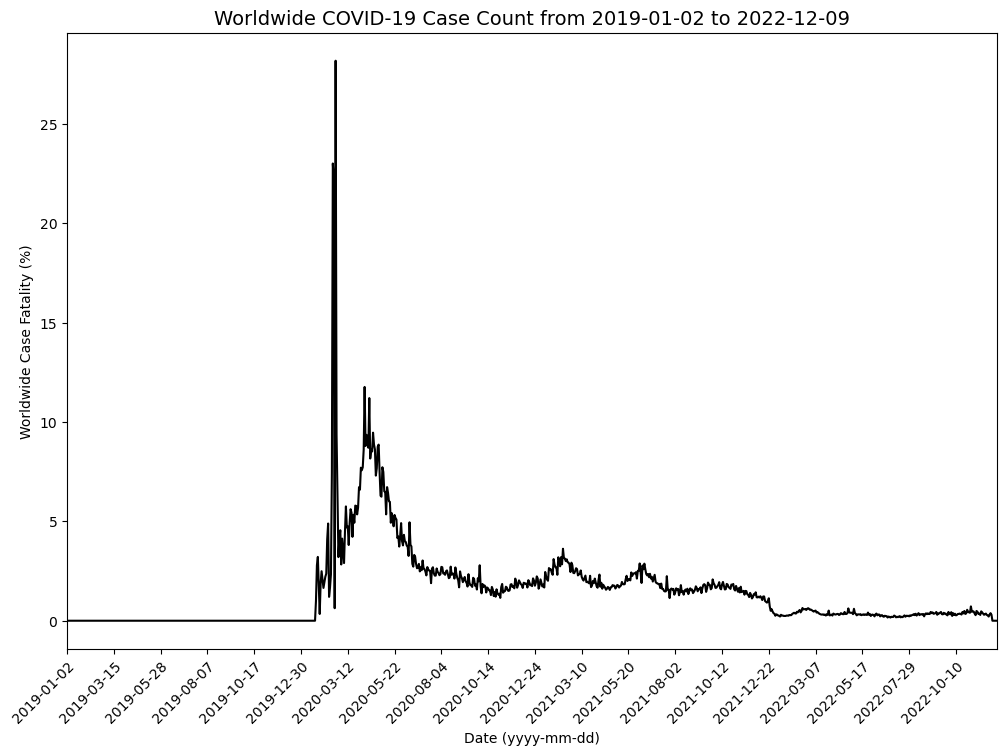

In [14]:
plt.figure(figsize=(12,8))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['Case Fatality'], color = 'k')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
plt.xlim(0, len(stock_cases['Date']))
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Worldwide Case Fatality (%)')
plt.title("Worldwide COVID-19 Case Count from "+ stock_cases['Date'][0] +\
          " to "+ stock_cases['Date'][length - 1] , fontsize=14)
plt.savefig(ParentDir + "\\" + "COVID-19DeathRateChart.png",\
               dpi=300, bbox_inches='tight')
plt.show()

# Netflix Stock Prices a Week Lagging

In [64]:
def Scatter(start, param_1, param_2):
    x_values = stock_cases.loc[(stock_cases["Date"] >= str(start))][str(param_1)]
    y_values = stock_cases.loc[(stock_cases["Date"] >= str(start))][str(param_2)]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r2="r-value: " + str(round(rvalue,2))
    if param_2 == "New Cases":
        plt.scatter(x_values,y_values, marker='o', edgecolor='black', facecolor='tab:blue')
    else:
        plt.scatter(x_values,y_values, marker='o', edgecolor='black', facecolor='tab:green')
    plt.plot(x_values,regress_values,"r-")
    handles, labels = plt.gca().get_legend_handles_labels()
    patch_1 = mpatches.Patch(color='none', label=line_eq)
    patch_2 = mpatches.Patch(color='none', label=r2)
    handles.extend([patch_1, patch_2])
    plt.legend(fontsize=14, loc='best',handlelength=0, handletextpad=0, fancybox=True,\
               handles=handles)
    plt.xlabel(f"Netflix {str(param_1)} Price ($)", fontsize=12)
    plt.ylabel(str(param_2), fontsize=12)
    correlation = st.pearsonr(x_values, y_values)       
    plt.gcf().set_size_inches(8, 7)
    plt.title(f"Worldwide COVID-19 {str(param_2)} vs. Netflix {str(param_1)} Price ($) from "+ stock_cases['Date'][0] +\
          " to "+ stock_cases['Date'][length - 1] ,pad=+20, fontsize=10)
    plt.savefig(ParentDir + "\\" + f"{str(start)} {str(param_2)}main.png",\
               dpi=300, bbox_inches='tight')
    print(f"The r-value is {round(rvalue,2)}"+" and "+f"The p-value is {round(correlation[0],3)}")
    plt.show()

The r-value is -0.06 and The p-value is -0.059


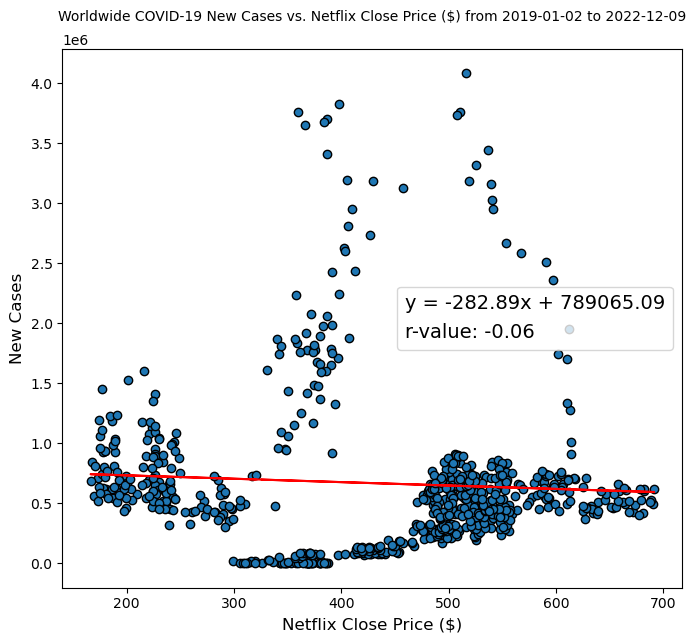

In [65]:
Scatter("2020-01-22", "Close", "New Cases")

The r-value is -0.07 and The p-value is -0.067


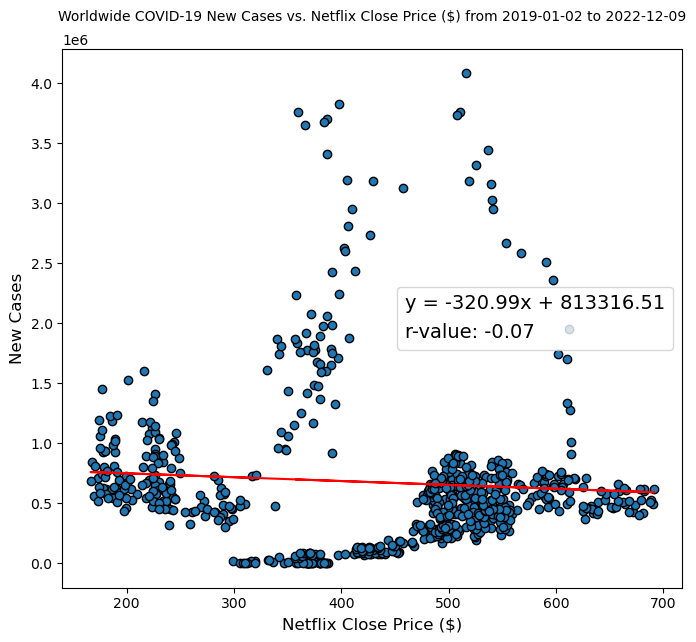

In [66]:
Scatter("2020-02-01", "Close", "New Cases")

The r-value is 0.69 and The p-value is 0.688


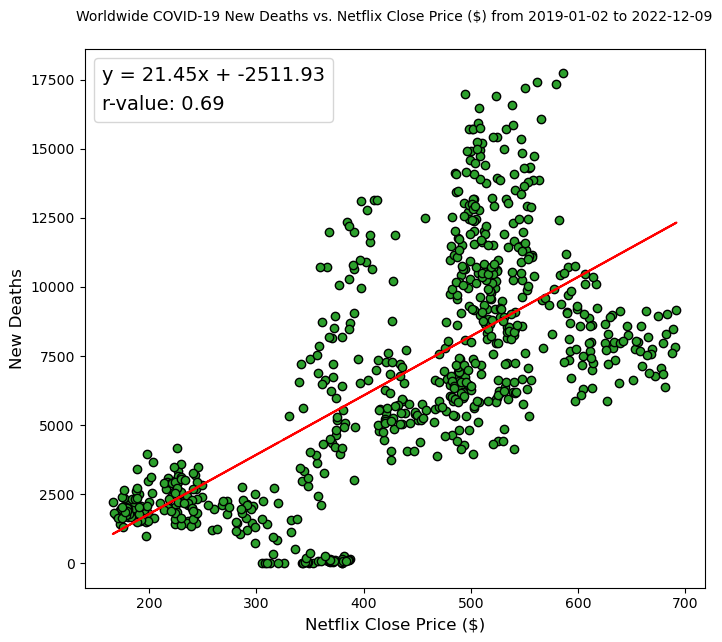

In [67]:
Scatter("2020-01-22", "Close", "New Deaths")

The r-value is 0.69 and The p-value is 0.688


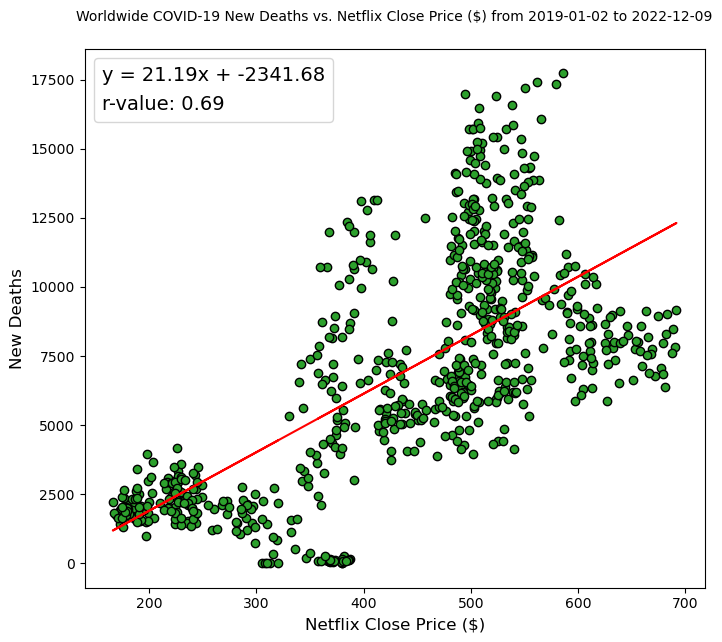

In [68]:
Scatter("2020-02-01", "Close", "New Deaths")

# Netflix Stock Prices vs. Case/ Death by Indicator

In [32]:
# SMA (Simple Moving Average) Indicator
# Help
    # df = DataFrame
    # SMA(df, firstperiod=7, secondperiod=14, Column='Close')
def SMA(df, period_1=7, period_2=14, Column='Close'):
    import numpy as np
    import matplotlib.pyplot as plt
    length=len(df['Date'])
    
    # adding SMA indicator
    df['SMA '+str(period_1)]= df[Column].rolling(window=period_1).mean()
    df['SMA '+str(period_2)]= df[Column].rolling(window=period_2).mean()

    # Buy and Sell Signal Define
    df['Signal']=np.where(df['SMA '+str(period_1)]>df['SMA '+str(period_2)], 1, 0)
    df['Position']=df['Signal'].diff()

    df['Buy']=np.where(df['Position']== 1, df['Close'], np.NAN)
    df['Sell']=np.where(df['Position']== -1, df['Close'], np.NAN)

    plt.figure(figsize=(20,10))
    # If plt.figure does not change the size, try placing it before plt.plot!

    plt.plot(df['Date'], df['Close'], color = 'k', alpha=0.5, label='Close Price')
    plt.plot(df['Date'], df['SMA '+str(period_1)], color = 'r', alpha=0.5,\
             label='SMA '+str(period_1))
    plt.plot(df['Date'], df['SMA '+str(period_2)], color = 'b', alpha=0.5,\
             label='SMA '+str(period_2))
    sizes = [200]
    plt.scatter(df['Date'], df['Buy'], sizes, alpha=1, marker='^', color= 'limegreen')
    plt.scatter(df['Date'], df['Sell'], sizes, alpha=1, marker='v', color= 'red')
    plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor',\
               ha = 'right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, length)
    plt.legend(fontsize=16)
    plt.xlabel('Date (yyyy-mm-dd)', fontsize=18)
    plt.ylabel('Closing Price in ($)', fontsize=18)
    plt.title("Netflix Closing Prices from "+ stock_cases['Date'][0] +" to "+\
              stock_cases['Date'][length - 1] , fontsize=20)
    plt.savefig(ParentDir + "\\" + "SMA" + "_" + str(period_1) + "_" + str(period_2) + ".png",\
               dpi=300, bbox_inches='tight')
    plt.show()
    return

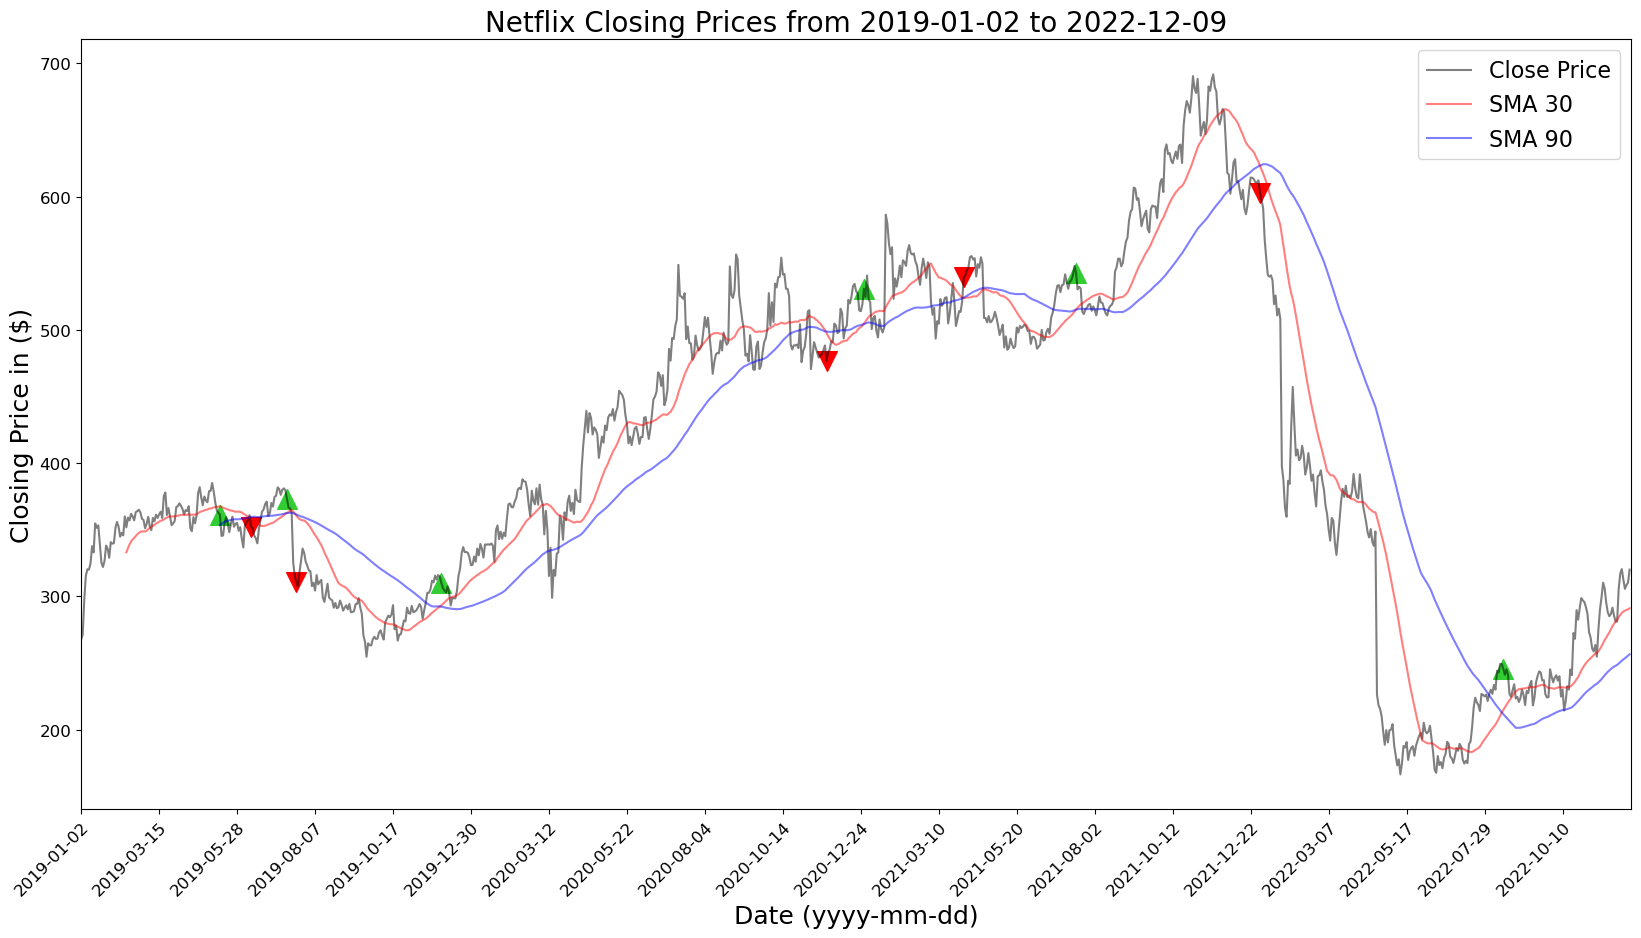

In [33]:
SMA(stock_cases, 30, 90, Column='Close')

In [34]:
stock_cases=stock_cases.fillna(0)
stock_cases

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  Case Fatality  New Deaths      SMA 30  \
0    11679500      0    0        0.0            0.0         0.0    0.000000   
1    14969600      0    0        0.0            0.0         0.0    0.000000   
2    19330100      0    0        0.0            0.0         0.0    0.000000   
3    18620100      0    0        0.0            0.0         0.0    0.000000   
4    15359200      0    0        0.0            0.0         0.0    0.000000   
..        ...    ...  ...        ...            ...         ...         ...   
989   8423000      0    0        0.0            0.0         0.0  288.439668   
990   7195400      0    0        0.0            0.0         0.0  289.210001   
991   7821600      0    0        0.0            0.0         0.0  289.790001   
992   7205300      0    0        0.0            0.0         0.0  290.178002   
993  14354700      0    0        0.0            0.0         0.0  290.947002   

         SMA 90  Signal  Position  Buy  Sell  
0      0.000000       0       0.0  0.0   0.0  
1      0.000000       0       0.0  0.0   0.0  
2      0.000000       0       0.0  0.0   0.0  
3      0.000000       0       0.0  0.0   0.0  
4      0.000000       0       0.0  0.0   0.0  
..          ...     ...       ...  ...   ...  
989  252.634334       1       0.0  0.0   0.0  
990  253.530556       1       0.0  0.0   0.0  
991  254.444001       1       0.0  0.0   0.0  
992  255.431112       1       0.0  0.0   0.0  
993  256.467557       1       0.0  0.0   0.0  

[994 rows x 18 columns]

In [35]:
#SMA Indicator output for month/season
stock_cases_buy_sell= stock_cases[(stock_cases["Buy"] != 0) | \
                                              (stock_cases["Sell"] != 0) ][['Date','Buy','Sell']]
stock_cases_buy_sell

Date         Buy        Sell
89   2019-05-10  361.040009    0.000000
109  2019-06-10    0.000000  352.010010
132  2019-07-12  373.250000    0.000000
138  2019-07-22    0.000000  310.619995
231  2019-12-02  309.989990    0.000000
478  2020-11-23    0.000000  476.619995
502  2020-12-29  530.869995    0.000000
566  2021-04-01    0.000000  539.419983
638  2021-07-15  542.950012    0.000000
756  2021-12-31    0.000000  602.440002
912  2022-08-16  245.690002    0.000000

In [ ]:
    maxlim1=y_values.max()
    minlim1=y_values.min()
    maxlim2=z_values.max()
    minlim2=z_values.min()
    ax4.set_ylim(minlim2,maxlim2)
    ax1.set_ylim(minlim1,maxlim1)
    plt.savefig(ParentDir + "\\" + f"{str(start)}_{str(stop)}_{str(param_4)}main.png",\
               dpi=300, bbox_inches='tight')

In [91]:
def Scatterind(start, stop, param_1, param_2, param_3, param_4):
    fig,ax1= plt.subplots( sharex=True, figsize=(8,8))
    x_values = stock_cases.loc[(stock_cases['Date'] >= str(start)) &\
                           (stock_cases['Date'] <= str(stop))][str(param_1)]
    y_values = stock_cases.loc[(stock_cases['Date'] >= str(start)) &\
                           (stock_cases['Date'] <= str(stop))][str(param_2)]
    z_values = stock_cases.loc[(stock_cases['Date'] >= str(start)) &\
                           (stock_cases['Date'] <= str(stop))][str(param_3)]
    maxlim1=y_values.max()
    minlim1=y_values.min()
    maxlim2=z_values.max()
    minlim2=z_values.min()

    ax1.scatter(x_values,y_values, marker='o', edgecolor='black',\
               facecolor='tab:blue', label=str(param_2))
    ax2=ax1.twinx()
    ax2.scatter(x_values,z_values, marker='o', edgecolor='black',\
                facecolor='tab:green', label=str(param_3))
    (slope1, intercept1, rvalue1, pvalue1, stderr1)=linregress(x_values, y_values)
    (slope2, intercept2, rvalue2, pvalue2, stderr2)=linregress(x_values, z_values)
    regress_values_1 = x_values * slope1 + intercept1
    regress_values_2 = x_values * slope2 + intercept2
    line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
    r2_1="r-value: " + str(round(rvalue1,2))
    line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept1,2))
    r2_2="r-value: " + str(round(rvalue2,2))
    ax3=ax2.twinx()
    ax3.plot(x_values,regress_values_1, color="r", lw=1)
    ax4=ax1.twinx()
    ax4.plot(x_values,regress_values_2, color="r", lw=1)
    ax1.set_xlabel('Netflix Close Price($)')
    ax1.set_ylabel(f"Worldwide {str(param_2)}", fontsize=11)
    ax2.set_ylabel(f"Worldwide {str(param_3)}",labelpad=+40, fontsize=11)
    ax4.set_ylim(minlim2,maxlim2)
    ax1.set_ylim(minlim1,maxlim1)
    ax3.set_yticks([])
    ax2.set_yticks([])
    # plt legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    patch_0 = mpatches.Circle((0.5, 0.5), radius = 0.25,\
                              fc='tab:blue', edgecolor='black', label=f" {str(param_2)}")
    patch_1 = mpatches.Patch(color='none', label=line_eq1)
    patch_2 = mpatches.Patch(color='none', label=r2_1)
    patch_3 = mpatches.Circle((0.5, 0.5), radius = 0.25,\
                              fc='tab:green', edgecolor='black', label=f" {str(param_3)}")
    patch_4 = mpatches.Patch(color='none', label=line_eq2)
    patch_5 = mpatches.Patch(color='none', label=r2_2)
    handles.extend([patch_0, patch_1, patch_2, patch_3, patch_4, patch_5])
    plt.legend(fontsize=10, loc="best",handlelength=0.7, handletextpad=0, fancybox=True,\
               handles=handles)
    plt.title(f"Worldwide COVID-19 Case/Death Count from {start} to {stop}", pad=+20, fontsize=12)
    correlation1 = st.pearsonr(x_values, y_values)
    correlation2 = st.pearsonr(x_values, z_values)
    print(f"{str(maxlim1)}")
    print(f"{str(maxlim2)}")
    print(f"{str(param_2)}: The r-value is {round(rvalue1,2)}"+" and "+\
          f"The p-value is {round(correlation1[0],3)}")
    print(f"{str(param_3)}: The r-value is {round(rvalue2,2)}"+" and "+\
          f"The p-value is {round(correlation2[0],3)}")
    plt.savefig(ParentDir + "\\" + f"{str(start)}_{str(stop)}_{str(param_4)}main.png",\
               dpi=300, bbox_inches='tight')
    plt.show()

674149.0
11752.0
New Cases: The r-value is 0.75 and The p-value is 0.753
New Deaths: The r-value is 0.67 and The p-value is 0.674


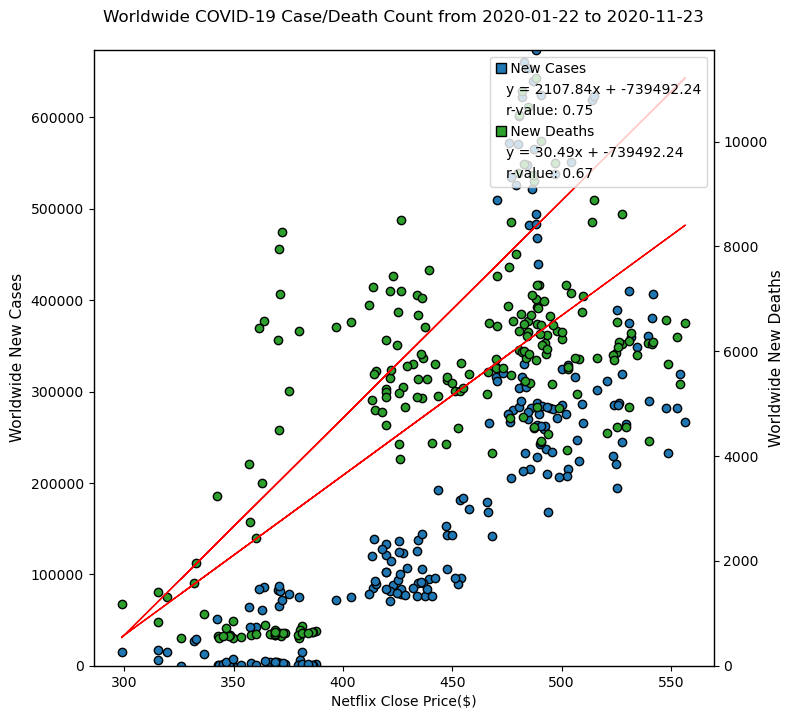

In [92]:
Scatterind("2020-01-22", "2020-11-23" , "Close", "New Cases", "New Deaths", "SMA")

869882.0
17733.0
New Cases: The r-value is -0.3 and The p-value is -0.3
New Deaths: The r-value is 0.2 and The p-value is 0.197


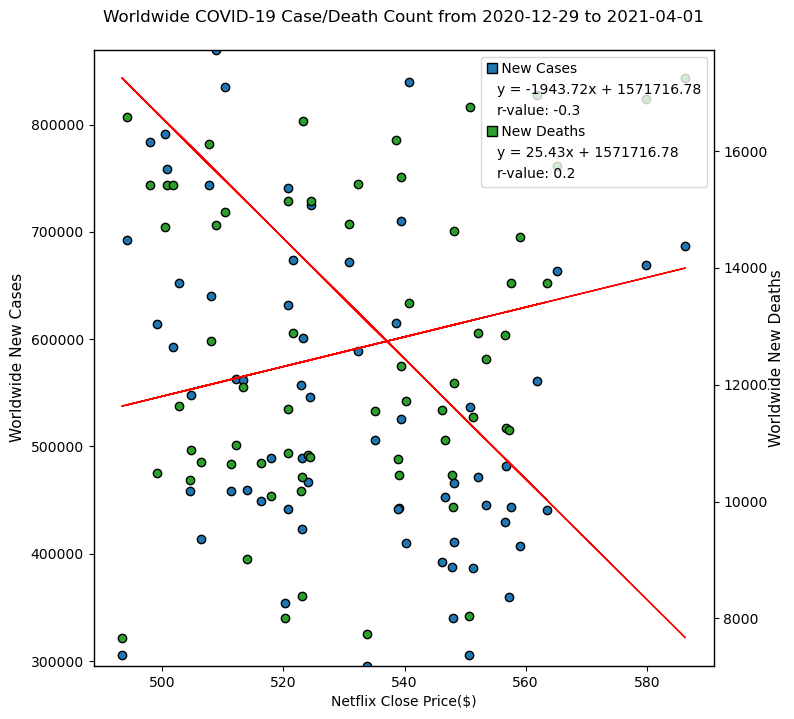

In [93]:
Scatterind("2020-12-29", "2021-04-01" , "Close", "New Cases", "New Deaths", "SMA")

1948718.0
12422.0
New Cases: The r-value is -0.17 and The p-value is -0.173
New Deaths: The r-value is -0.57 and The p-value is -0.571


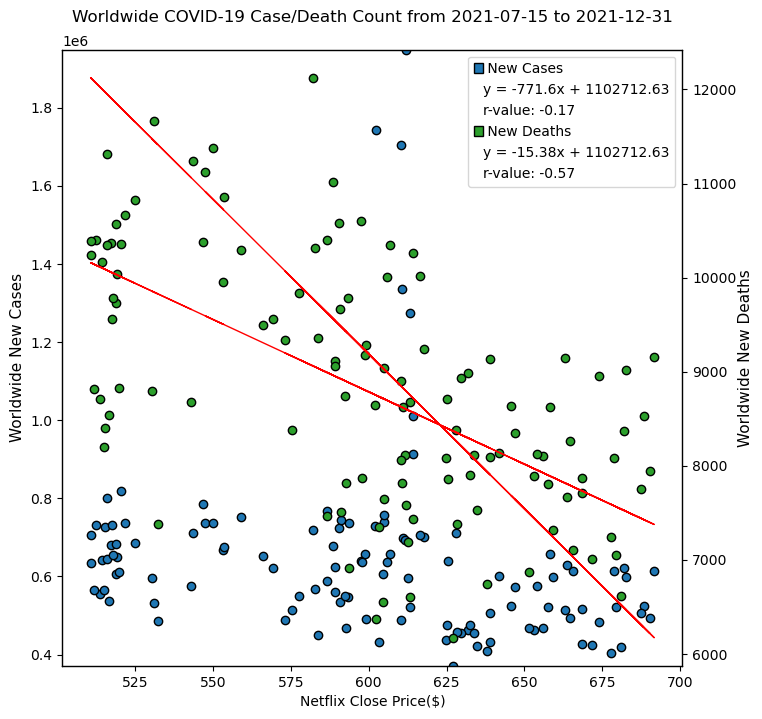

In [94]:
Scatterind("2021-07-15", "2021-12-31" , "Close", "New Cases", "New Deaths", "SMA")

4083952.0
13163.0
New Cases: The r-value is 0.82 and The p-value is 0.818
New Deaths: The r-value is 0.71 and The p-value is 0.713


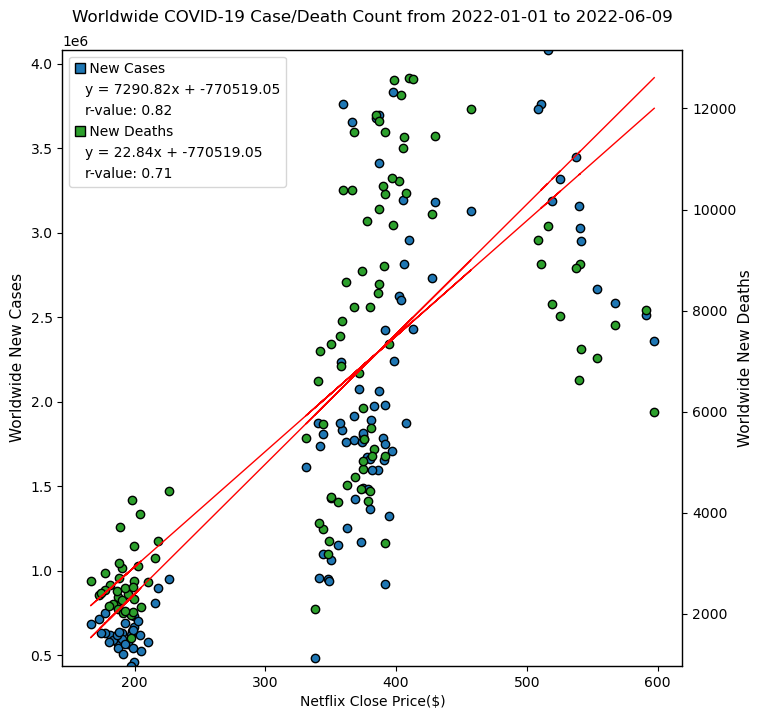

In [95]:
Scatterind("2022-01-01", "2022-06-09" , "Close", "New Cases", "New Deaths", "SMA")

In [118]:
# IchimokuCloud Indicator
def IchimokuCloud(df):
    high_9 = df['High'].rolling(window= 9).max()
    low_9 = df['Low'].rolling(window= 9).min()
    df['tenkan_sen'] = (high_9 + low_9) /2

    high_26 = df['High'].rolling(window= 26).max()
    low_26 = df['Low'].rolling(window= 26).min()
    df['kijun_sen'] = (high_26 + low_26) /2

    last_index = df.iloc[-1:].index[0]
    last_date = df['Date']

    df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

    high_52 = df['High'].rolling(window= 52).max()
    low_52 = df['Low'].rolling(window= 52).min()
    df['senkou_span_b'] = ((high_52 + low_52) /2).shift(26)

    df['chikou_span'] = df['Close'].shift(-22) 

    plt.figure(figsize=(20,10))
    plt.plot(df['Date'], df['Close'], color = 'k', alpha=0.5, label='Close Price')
    plt.plot(df['Date'], df['senkou_span_a'], color = 'limegreen', alpha=0.5, label='Senkou Span A')
    plt.plot(df['Date'], df['senkou_span_b'], color = 'orangered', alpha=0.5, label='Senkou Span B')
    plt.fill_between(df['Date'], df.senkou_span_a, df.senkou_span_b,where = df.senkou_span_a >=\
                    df.senkou_span_b, color = 'limegreen')
    plt.fill_between(df['Date'], df.senkou_span_a, df.senkou_span_b,where = df.senkou_span_a < \
                    df.senkou_span_b, color = 'orangered')
    plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
    plt.yticks(fontsize='12')
    plt.xlim(0, length)
    plt.legend(fontsize='12')
    plt.xlabel('Date (yyyy-mm-dd)', fontsize='14')
    plt.ylabel('Closing Price in ($)', fontsize='14')
    plt.title("Netflix Closing Prices from "+ stock_cases['Date'][0] +" to "+\
              stock_cases['Date'][length - 1] , fontsize=20)
    plt.savefig(ParentDir + "\\" + f"IchimokuCloud Indicator.png",\
               dpi=300, bbox_inches='tight')
    plt.show()
    return

In [119]:
IchimokuCloud(stock_cases)

In [100]:
# IchimokuCloud Indicator
stock_cases_IchimokuCloud= stock_cases[stock_cases["senkou_span_a"] ==
                                       stock_cases["senkou_span_b"]][['Date','Close','New Deaths']]
stock_cases_IchimokuCloud

Date       Close  New Deaths
104  2019-06-03  336.630005         0.0
105  2019-06-04  353.399994         0.0
162  2019-08-23  291.440002         0.0
163  2019-08-26  294.980011         0.0
326  2020-04-20  437.489990      6511.0
327  2020-04-21  433.829987      7197.0
983  2022-11-25  285.540009      1977.0
984  2022-11-28  281.170013      1155.0
985  2022-11-29  280.959991      1501.0
986  2022-11-30  305.529999      1609.0
987  2022-12-01  316.950012      2728.0

In [101]:
Scatterind("2020-01-22", "2020-12-31" , "Close", "New Cases", "New Deaths", "IchimokuCloud")

839572.0
15418.0
New Cases: The r-value is 0.75 and The p-value is 0.751
New Deaths: The r-value is 0.69 and The p-value is 0.692


907690.0
17733.0
New Cases: The r-value is -0.05 and The p-value is -0.055
New Deaths: The r-value is 0.06 and The p-value is 0.063


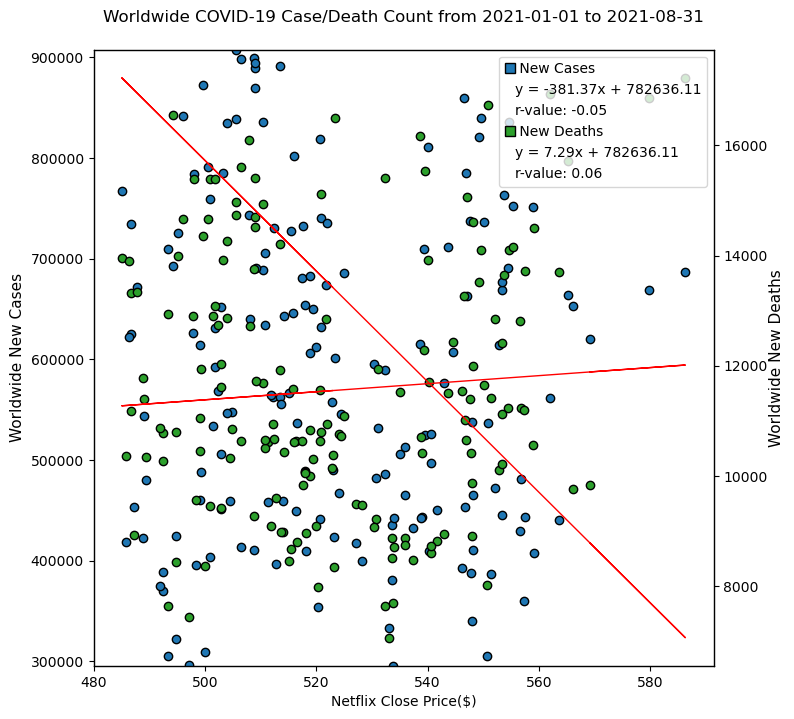

In [102]:
Scatterind("2021-01-01", "2021-08-31" , "Close", "New Cases", "New Deaths", "IchimokuCloud")

4083952.0
12481.0
New Cases: The r-value is -0.82 and The p-value is -0.823
New Deaths: The r-value is -0.49 and The p-value is -0.488


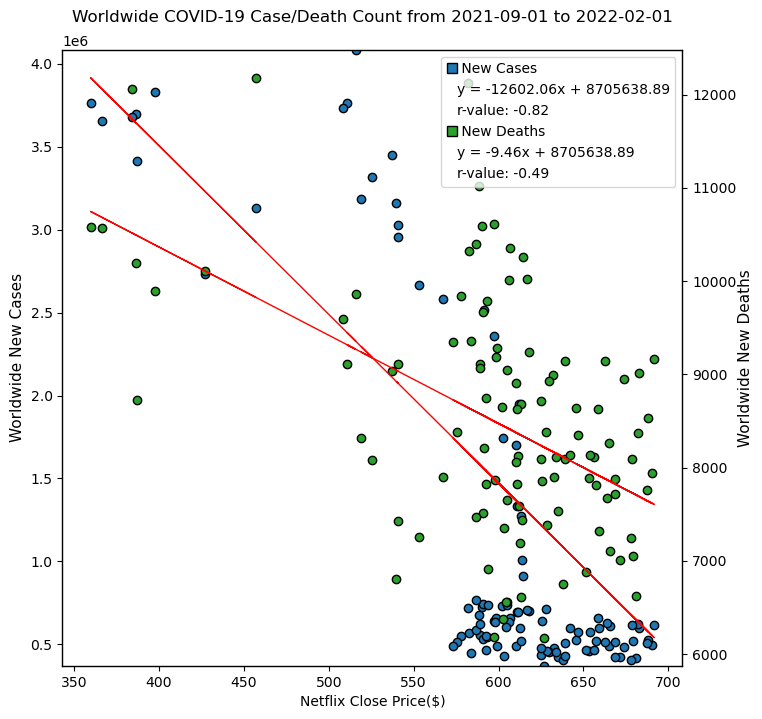

In [103]:
Scatterind("2021-09-01", "2022-02-01" , "Close", "New Cases", "New Deaths", "IchimokuCloud")

In [104]:
stock_cases

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  ...      SMA 90  Signal  Position  Buy  \
0    11679500      0    0        0.0  ...    0.000000       0       0.0  0.0   
1    14969600      0    0        0.0  ...    0.000000       0       0.0  0.0   
2    19330100      0    0        0.0  ...    0.000000       0       0.0  0.0   
3    18620100      0    0        0.0  ...    0.000000       0       0.0  0.0   
4    15359200      0    0        0.0  ...    0.000000       0       0.0  0.0   
..        ...    ...  ...        ...  ...         ...     ...       ...  ...   
989   8423000      0    0        0.0  ...  252.634334       1       0.0  0.0   
990   7195400      0    0        0.0  ...  253.530556       1       0.0  0.0   
991   7821600      0    0        0.0  ...  254.444001       1       0.0  0.0   
992   7205300      0    0        0.0  ...  255.431112       1       0.0  0.0   
993  14354700      0    0        0.0  ...  256.467557       1       0.0  0.0   

     Sell  tenkan_sen   kijun_sen  senkou_span_a  senkou_span_b  chikou_span  
0     0.0         NaN         NaN            NaN            NaN   351.339996  
1     0.0         NaN         NaN            NaN            NaN   355.809998  
2     0.0         NaN         NaN            NaN            NaN   352.190002  
3     0.0         NaN         NaN            NaN            NaN   344.709991  
4     0.0         NaN         NaN            NaN            NaN   347.570007  
..    ...         ...         ...            ...            ...          ...  
989   0.0  299.354996  287.429993     264.347500         258.68          NaN  
990   0.0  299.354996  287.429993     265.180000         258.68          NaN  
991   0.0  299.354996  287.429993     271.412502         258.68          NaN  
992   0.0  299.354996  287.429993     272.167500         258.68          NaN  
993   0.0  302.470001  290.544998     272.167500         258.68          NaN  

[994 rows x 23 columns]

In [105]:
stock_cases

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  ...      SMA 90  Signal  Position  Buy  \
0    11679500      0    0        0.0  ...    0.000000       0       0.0  0.0   
1    14969600      0    0        0.0  ...    0.000000       0       0.0  0.0   
2    19330100      0    0        0.0  ...    0.000000       0       0.0  0.0   
3    18620100      0    0        0.0  ...    0.000000       0       0.0  0.0   
4    15359200      0    0        0.0  ...    0.000000       0       0.0  0.0   
..        ...    ...  ...        ...  ...         ...     ...       ...  ...   
989   8423000      0    0        0.0  ...  252.634334       1       0.0  0.0   
990   7195400      0    0        0.0  ...  253.530556       1       0.0  0.0   
991   7821600      0    0        0.0  ...  254.444001       1       0.0  0.0   
992   7205300      0    0        0.0  ...  255.431112       1       0.0  0.0   
993  14354700      0    0        0.0  ...  256.467557       1       0.0  0.0   

     Sell  tenkan_sen   kijun_sen  senkou_span_a  senkou_span_b  chikou_span  
0     0.0         NaN         NaN            NaN            NaN   351.339996  
1     0.0         NaN         NaN            NaN            NaN   355.809998  
2     0.0         NaN         NaN            NaN            NaN   352.190002  
3     0.0         NaN         NaN            NaN            NaN   344.709991  
4     0.0         NaN         NaN            NaN            NaN   347.570007  
..    ...         ...         ...            ...            ...          ...  
989   0.0  299.354996  287.429993     264.347500         258.68          NaN  
990   0.0  299.354996  287.429993     265.180000         258.68          NaN  
991   0.0  299.354996  287.429993     271.412502         258.68          NaN  
992   0.0  299.354996  287.429993     272.167500         258.68          NaN  
993   0.0  302.470001  290.544998     272.167500         258.68          NaN  

[994 rows x 23 columns]

In [106]:
# Average directional index (ADX)
def ADX(df, period):
    alpha = 1/period

    # TR
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['High'] - df['High'].shift(1)
    df['pL-L'] = df['Low'].shift(1) - df['Low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'+str(period)] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']

    return df

https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp

In [109]:
ADX(stock_cases,30)
ADX(stock_cases,14)

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  ...  Position  Buy  Sell  tenkan_sen  \
0    11679500      0    0        0.0  ...       0.0  0.0   0.0         NaN   
1    14969600      0    0        0.0  ...       0.0  0.0   0.0         NaN   
2    19330100      0    0        0.0  ...       0.0  0.0   0.0         NaN   
3    18620100      0    0        0.0  ...       0.0  0.0   0.0         NaN   
4    15359200      0    0        0.0  ...       0.0  0.0   0.0         NaN   
..        ...    ...  ...        ...  ...       ...  ...   ...         ...   
989   8423000      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
990   7195400      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
991   7821600      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
992   7205300      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
993  14354700      0    0        0.0  ...       0.0  0.0   0.0  302.470001   

      kijun_sen  senkou_span_a  senkou_span_b  chikou_span       ADX30  \
0           NaN            NaN            NaN   351.339996         NaN   
1           NaN            NaN            NaN   355.809998  100.000000   
2           NaN            NaN            NaN   352.190002  100.000000   
3           NaN            NaN            NaN   344.709991  100.000000   
4           NaN            NaN            NaN   347.570007  100.000000   
..          ...            ...            ...          ...         ...   
989  287.429993     264.347500         258.68          NaN   16.789190   
990  287.429993     265.180000         258.68          NaN   16.948129   
991  287.429993     271.412502         258.68          NaN   17.079609   
992  287.429993     272.167500         258.68          NaN   17.246227   
993  290.544998     272.167500         258.68          NaN   17.628346   

          ADX14  
0           NaN  
1    100.000000  
2    100.000000  
3    100.000000  
4    100.000000  
..          ...  
989   22.395480  
990   22.543890  
991   22.580446  
992   22.789879  
993   23.894320  

[994 rows x 25 columns]

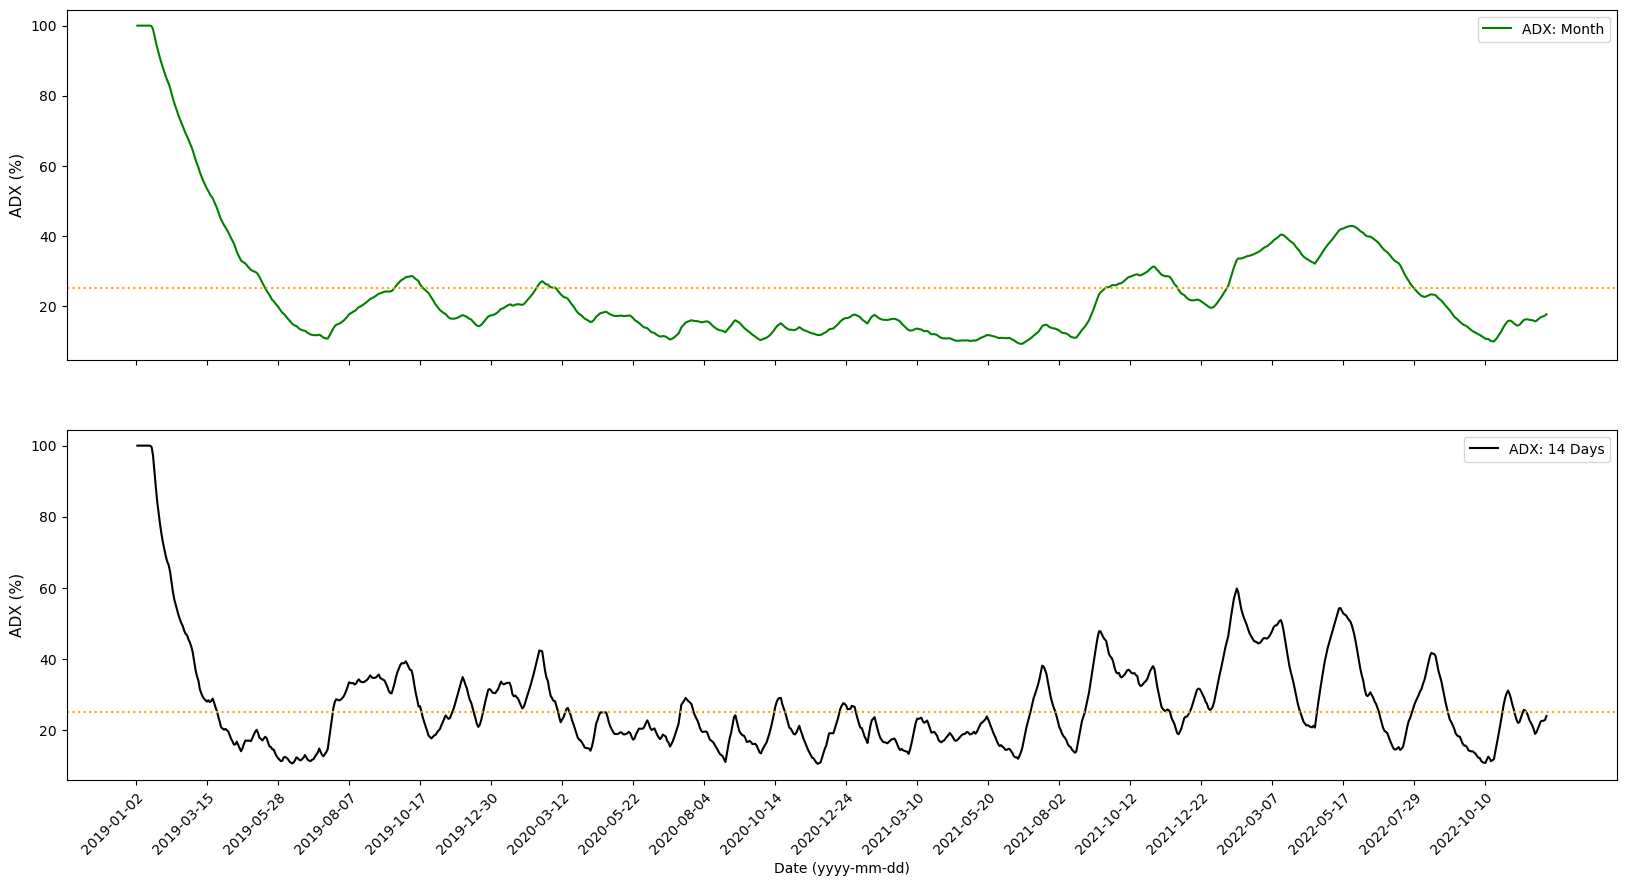

In [142]:
fig,(ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

ax1.plot(stock_cases['Date'], stock_cases['ADX30'], color = 'green', label='ADX: Month')
# plt.plot(final_stock_cases['Date'], final_stock_cases['ADX7'], color = 'red', label='Week')
ax2.plot(stock_cases['Date'], stock_cases['ADX14'], color = 'k', label='ADX: 14 Days')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlim(0, 598)
ax1.axhline(25, color='orange', linestyle='dotted')
ax2.axhline(25, color='orange', linestyle='dotted')
# ax1.axhline(31, color='orange', linestyle='dotted')
plt.xlabel('Date (yyyy-mm-dd)')
ax1.set_ylabel(f"ADX (%)", fontsize=11)
ax2.set_ylabel(f"ADX (%)", fontsize=11)
ax1.legend()
ax2.legend()
plt.savefig(ParentDir + "\\" + f"ADX.png",\
               dpi=300, bbox_inches='tight')
plt.show()

In [133]:
stock_cases_ADX= stock_cases[(stock_cases["ADX14"] <= 25) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','ADX14','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date      ADX14       Close  New Cases  New Deaths
298  2020-03-10  23.604390  364.130005     4786.0       275.0
299  2020-03-11  22.138178  349.920013     7504.0       352.0
300  2020-03-12  22.884714  315.250000     6756.0       321.0
301  2020-03-13  23.520260  336.299988    13194.0       503.0
302  2020-03-16  24.626267  298.839996    14567.0       715.0
..          ...        ...         ...        ...         ...
827  2022-04-13  20.822558  350.429993  1062559.0      4030.0
828  2022-04-14  20.712616  341.130005   956748.0      3464.0
829  2022-04-18  21.150324  337.859985   479768.0      1587.0
830  2022-04-19  20.629302  348.609985   939675.0      3077.0
831  2022-04-20  23.764226  226.190002   949296.0      4169.0

[346 rows x 5 columns]

In [134]:
def Scatterind2(start, stop, param_1, param_2, param_3, param_4):
    fig,ax1= plt.subplots( sharex=True, figsize=(8,8))
    x_values = stock_cases_ADX[str(param_1)]
    y_values = stock_cases_ADX[str(param_2)]
    z_values = stock_cases_ADX[str(param_3)]
    
    maxlim1=y_values.max()
    minlim1=y_values.min()
    maxlim2=z_values.max()
    minlim2=z_values.min()
    
    ax1.scatter(x_values,y_values, marker='o', edgecolor='black',\
               facecolor='tab:blue', label=str(param_2))
    ax2=ax1.twinx()
    ax2.scatter(x_values,z_values, marker='o', edgecolor='black',\
                facecolor='tab:green', label=str(param_3))
    (slope1, intercept1, rvalue1, pvalue1, stderr1)=linregress(x_values, y_values)
    (slope2, intercept2, rvalue2, pvalue2, stderr2)=linregress(x_values, z_values)
    regress_values_1 = x_values * slope1 + intercept1
    regress_values_2 = x_values * slope2 + intercept2
    line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
    r2_1="r-value: " + str(round(rvalue1,2))
    line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept1,2))
    r2_2="r-value: " + str(round(rvalue2,2))
    ax3=ax2.twinx()
    ax3.plot(x_values,regress_values_1, color="r", lw=1)
    ax4=ax1.twinx()
    ax4.plot(x_values,regress_values_2, color="r", lw=1)
    plt.xlabel('Date (yyyy-mm-dd)')
    ax1.set_ylabel(f"Worldwide {str(param_2)}", fontsize=11)
    ax2.set_ylabel(f"Worldwide {str(param_3)}",labelpad=+40, fontsize=11)
    ax4.set_ylim(minlim2,maxlim2)
    ax1.set_ylim(minlim1,maxlim1)
    ax3.set_yticks([])
    ax2.set_yticks([])
    # plt legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    patch_0 = mpatches.Circle((0.5, 0.5), radius = 0.25,\
                              fc='tab:blue', edgecolor='black', label=f" {str(param_2)}")
    patch_1 = mpatches.Patch(color='none', label=line_eq1)
    patch_2 = mpatches.Patch(color='none', label=r2_1)
    patch_3 = mpatches.Circle((0.5, 0.5), radius = 0.25,\
                              fc='tab:green', edgecolor='black', label=f" {str(param_3)}")
    patch_4 = mpatches.Patch(color='none', label=line_eq2)
    patch_5 = mpatches.Patch(color='none', label=r2_2)
    handles.extend([patch_0, patch_1, patch_2, patch_3, patch_4, patch_5])
    plt.legend(fontsize=10, loc="best",handlelength=0.7, handletextpad=0, fancybox=True,\
               handles=handles)
    plt.title(f"Worldwide COVID-19 Case/Death Count from {start} to {stop}",pad=20, fontsize=12)
    correlation1 = st.pearsonr(x_values, y_values)
    correlation2 = st.pearsonr(x_values, z_values)
    print(f"{str(param_2)}: The r-value is {round(rvalue1,2)}"+" and "+\
          f"The p-value is {round(correlation1[0],3)}")
    print(f"{str(param_3)}: The r-value is {round(rvalue2,2)}"+" and "+\
          f"The p-value is {round(correlation2[0],3)}")
    plt.savefig(ParentDir + "\\" + f"{str(start)}_{str(stop)}_{str(param_4)}main.png",\
               dpi=300, bbox_inches='tight')
    plt.show()

In [135]:
Scatterind2('2020-01-22', '2022-06-01', "Close", "New Cases", "New Deaths", "ADX14")

New Cases: The r-value is 0.35 and The p-value is 0.352
New Deaths: The r-value is 0.56 and The p-value is 0.562


In [136]:
stock_cases_ADX= stock_cases[(stock_cases["ADX30"] <= 25) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','ADX14','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date      ADX14       Close  New Cases  New Deaths
266  2020-01-23  29.446561  349.600006      100.0         1.0
267  2020-01-24  29.686679  353.160004      287.0         8.0
268  2020-01-27  29.203007  342.880005      809.0        26.0
269  2020-01-28  28.798953  348.519989     2651.0        49.0
270  2020-01-29  27.811314  343.160004      589.0         2.0
..          ...        ...         ...        ...         ...
763  2022-01-11  35.676961  540.840027  3028898.0      9106.0
764  2022-01-12  37.423201  537.219971  3446713.0      9023.0
765  2022-01-13  39.394368  519.200012  3185558.0      8229.0
766  2022-01-14  41.369052  525.690002  3316600.0      7967.0
767  2022-01-18  43.273915  510.799988  3764260.0      9106.0

[437 rows x 5 columns]

In [137]:
Scatterind2('2020-01-22', '2022-06-01', "Close", "New Cases", "New Deaths", "ADX30")

New Cases: The r-value is 0.51 and The p-value is 0.506
New Deaths: The r-value is 0.58 and The p-value is 0.585


In [140]:
stock_cases_ADX= stock_cases[(stock_cases["ADX30"] <= 25) &\
                             (stock_cases["ADX14"] <= 25)&\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','ADX14','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date      ADX14       Close  New Cases  New Deaths
298  2020-03-10  23.604390  364.130005     4786.0       275.0
299  2020-03-11  22.138178  349.920013     7504.0       352.0
300  2020-03-12  22.884714  315.250000     6756.0       321.0
301  2020-03-13  23.520260  336.299988    13194.0       503.0
302  2020-03-16  24.626267  298.839996    14567.0       715.0
..          ...        ...         ...        ...         ...
737  2021-12-03  21.917046  602.130005   730519.0      8591.0
738  2021-12-06  23.307408  612.690002   597172.0      6990.0
739  2021-12-07  23.687937  625.580017   638968.0      7728.0
740  2021-12-08  23.774684  628.080017   711133.0      8299.0
741  2021-12-09  24.394142  611.000000   698027.0      8570.0

[329 rows x 5 columns]

New Cases: The r-value is 0.68 and The p-value is 0.677
New Deaths: The r-value is 0.57 and The p-value is 0.573


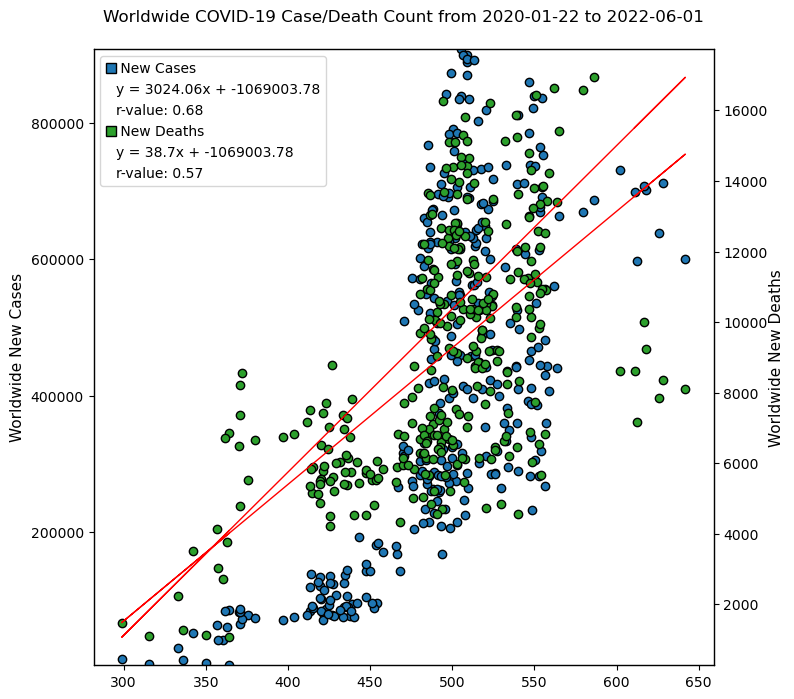

In [141]:
Scatterind2('2020-01-22', '2022-06-01', "Close", "New Cases", "New Deaths", "ADX1430")

In [143]:
stock_cases=stock_cases.fillna(0)
stock_cases

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  ...  Position  Buy  Sell  tenkan_sen  \
0    11679500      0    0        0.0  ...       0.0  0.0   0.0    0.000000   
1    14969600      0    0        0.0  ...       0.0  0.0   0.0    0.000000   
2    19330100      0    0        0.0  ...       0.0  0.0   0.0    0.000000   
3    18620100      0    0        0.0  ...       0.0  0.0   0.0    0.000000   
4    15359200      0    0        0.0  ...       0.0  0.0   0.0    0.000000   
..        ...    ...  ...        ...  ...       ...  ...   ...         ...   
989   8423000      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
990   7195400      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
991   7821600      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
992   7205300      0    0        0.0  ...       0.0  0.0   0.0  299.354996   
993  14354700      0    0        0.0  ...       0.0  0.0   0.0  302.470001   

      kijun_sen  senkou_span_a  senkou_span_b  chikou_span       ADX30  \
0      0.000000       0.000000           0.00   351.339996    0.000000   
1      0.000000       0.000000           0.00   355.809998  100.000000   
2      0.000000       0.000000           0.00   352.190002  100.000000   
3      0.000000       0.000000           0.00   344.709991  100.000000   
4      0.000000       0.000000           0.00   347.570007  100.000000   
..          ...            ...            ...          ...         ...   
989  287.429993     264.347500         258.68     0.000000   16.789190   
990  287.429993     265.180000         258.68     0.000000   16.948129   
991  287.429993     271.412502         258.68     0.000000   17.079609   
992  287.429993     272.167500         258.68     0.000000   17.246227   
993  290.544998     272.167500         258.68     0.000000   17.628346   

          ADX14  
0      0.000000  
1    100.000000  
2    100.000000  
3    100.000000  
4    100.000000  
..          ...  
989   22.395480  
990   22.543890  
991   22.580446  
992   22.789879  
993   23.894320  

[994 rows x 25 columns]

In [145]:
# Stochastic Oscillator
stock_cases['14high'] = stock_cases['High'].rolling(14).max()
stock_cases['14low'] = stock_cases['Low'].rolling(14).min()
stock_cases['%K'] = (stock_cases['Close'] - stock_cases['14low'])*100/\
(stock_cases['14high'] - stock_cases['14low'])
stock_cases['%D'] = stock_cases['%K'].rolling(7).mean()

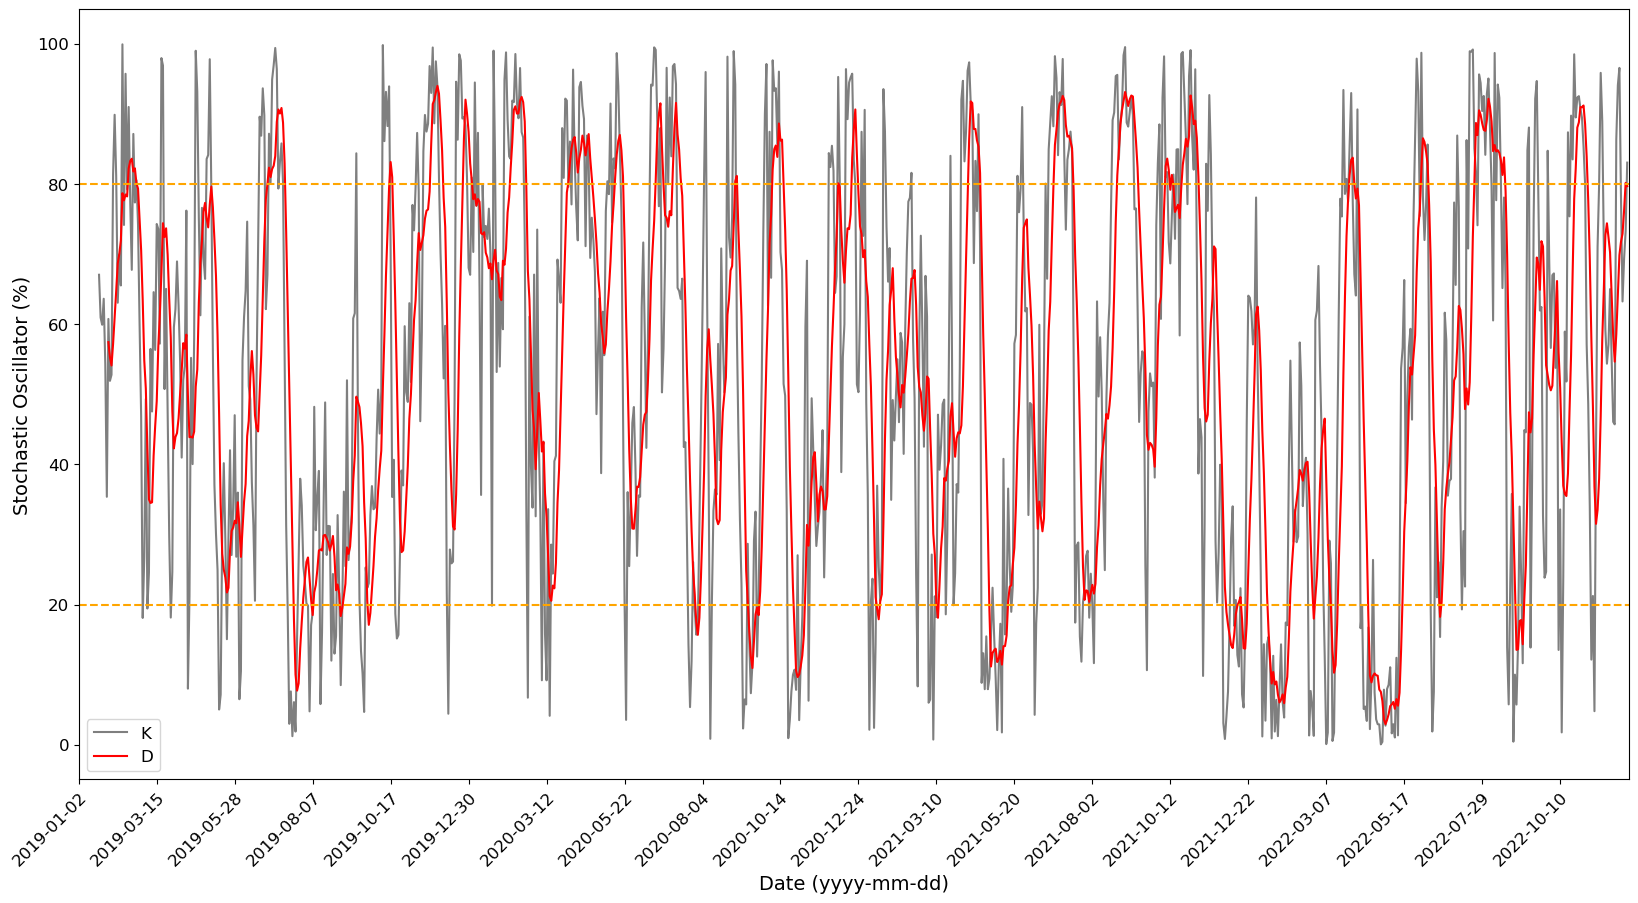

In [175]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(stock_cases['Date'], stock_cases['%K'], color = 'k', alpha=0.5, label='K')
ax.plot(stock_cases['Date'], stock_cases['%D'], color = 'red', label='D')
ax.axhline(20, linestyle='--', color="orange")
ax.axhline(80, linestyle="--", color="orange")
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.xlim(0, length)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize=14)
plt.ylabel('Stochastic Oscillator (%)', fontsize=14)
plt.savefig(ParentDir + "\\" + f"Stochastic Oscillator.png",\
               dpi=300, bbox_inches='tight')
plt.show()

In [156]:
stock_cases

Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  ...   kijun_sen  senkou_span_a  \
0    11679500      0    0        0.0  ...    0.000000       0.000000   
1    14969600      0    0        0.0  ...    0.000000       0.000000   
2    19330100      0    0        0.0  ...    0.000000       0.000000   
3    18620100      0    0        0.0  ...    0.000000       0.000000   
4    15359200      0    0        0.0  ...    0.000000       0.000000   
..        ...    ...  ...        ...  ...         ...            ...   
989   8423000      0    0        0.0  ...  287.429993     264.347500   
990   7195400      0    0        0.0  ...  287.429993     265.180000   
991   7821600      0    0        0.0  ...  287.429993     271.412502   
992   7205300      0    0        0.0  ...  287.429993     272.167500   
993  14354700      0    0        0.0  ...  290.544998     272.167500   

     senkou_span_b  chikou_span       ADX30       ADX14      14high  \
0             0.00   351.339996    0.000000    0.000000         NaN   
1             0.00   355.809998  100.000000  100.000000         NaN   
2             0.00   352.190002  100.000000  100.000000         NaN   
3             0.00   344.709991  100.000000  100.000000         NaN   
4             0.00   347.570007  100.000000  100.000000         NaN   
..             ...          ...         ...         ...         ...   
989         258.68     0.000000   16.789190   22.395480  322.769989   
990         258.68     0.000000   16.948129   22.543890  322.769989   
991         258.68     0.000000   17.079609   22.580446  322.769989   
992         258.68     0.000000   17.246227   22.789879  322.769989   
993         258.68     0.000000   17.628346   23.894320  329.000000   

          14low         %K         %D  
0           NaN        NaN        NaN  
1           NaN        NaN        NaN  
2           NaN        NaN        NaN  
3           NaN        NaN        NaN  
4           NaN        NaN        NaN  
..          ...        ...        ...  
989  275.940002  78.261807  71.750172  
990  275.940002  63.250061  72.903062  
991  275.940002  69.357293  76.228921  
992  275.940002  73.286392  80.167375  
993  275.940002  83.056934  79.696222  

[994 rows x 29 columns]

In [163]:
stock_cases_ADX= stock_cases.loc[(stock_cases["%K"] >= 20) &\
                             (stock_cases["%K"] <= 80) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','%K','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date         %K       Close  New Cases  New Deaths
268  2020-01-27  53.186204  342.880005      809.0        26.0
269  2020-01-28  68.744780  348.519989     2651.0        49.0
270  2020-01-29  53.958614  343.160004      589.0         2.0
271  2020-01-30  66.593060  347.739990     2068.0        39.0
272  2020-01-31  59.282732  345.089996     1690.0        42.0
..          ...        ...         ...        ...         ...
852  2022-05-19  49.843988  183.479996   587740.0      1696.0
853  2022-05-20  56.731463  186.350006   619377.0      1983.0
854  2022-05-23  59.347245  187.440002   539644.0      1601.0
855  2022-05-24  46.394710  180.339996   579303.0      1655.0
856  2022-05-25  75.708260  187.830002   634293.0      2600.0

[318 rows x 5 columns]

New Cases: The r-value is -0.04 and The p-value is -0.039
New Deaths: The r-value is 0.5 and The p-value is 0.502


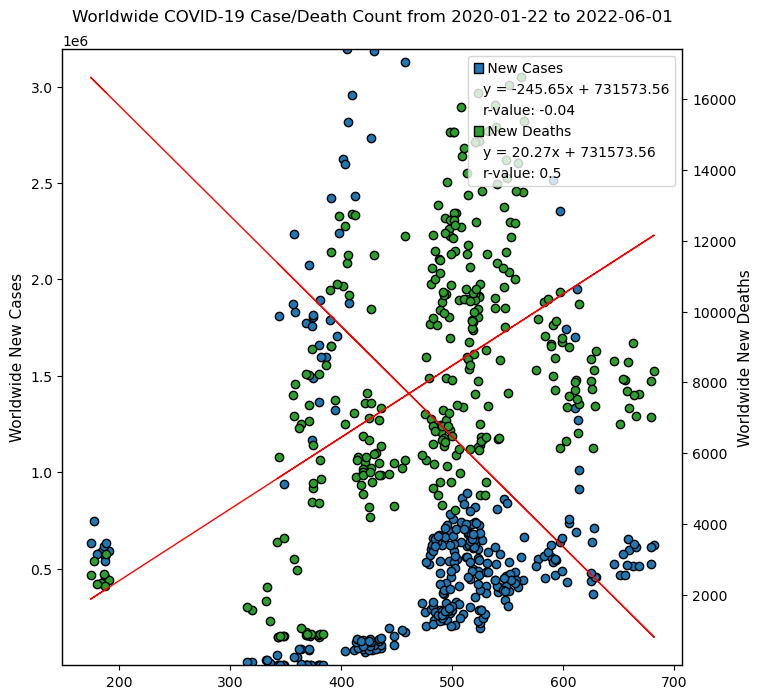

In [164]:
Scatterind2('2020-01-22', '2022-06-01',"Close", "New Cases", "New Deaths", "SOin")

In [166]:
stock_cases_ADX= stock_cases.loc[(stock_cases["%K"] < 20) |\
                             (stock_cases["%K"] > 80) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','%K','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date         %K       Close  New Cases  New Deaths
41   2019-03-04  18.101799  351.040009        0.0         0.0
44   2019-03-07  19.445634  352.600006        0.0         0.0
59   2019-03-28  18.154280  354.609985        0.0         0.0
70   2019-04-12   8.013231  351.140015        0.0         0.0
90   2019-05-13   5.036149  345.260010        0.0         0.0
..          ...        ...         ...        ...         ...
931  2022-09-13  13.870976  218.130005   544897.0      1992.0
949  2022-10-07  13.537112  224.750000   522620.0      1805.0
951  2022-10-11   1.772826  214.289993   654425.0      1919.0
970  2022-11-07  12.159150  258.600006   327895.0      1194.0
972  2022-11-09   4.800162  254.660004   424591.0      2094.0

[328 rows x 5 columns]

In [167]:
Scatterind2('2020-01-22', '2022-06-01',"Close", "New Cases", "New Deaths", "SOout")

New Cases: The r-value is 0.07 and The p-value is 0.073
New Deaths: The r-value is 0.68 and The p-value is 0.679


In [168]:
# Define Exponential Moving Average
def EMA(df,period=7, Column='Close'):
    return df[Column].ewm(span=period, adjust=False).mean()

In [169]:
def RSIIndicator(df, period=14, Column='Close'):
    delta = df[Column].diff(1)
    df['gain'] = delta.clip(lower=0).round(2)
    df['loss'] = delta.clip(upper=0).abs().round(2)
    df['avg_gain'] = df['gain'].rolling(window=period, min_periods=period).mean()[:period+1]
    df['avg_loss'] = df['loss'].rolling(window=period, min_periods=period).mean()[:period+1]
    for i, row in enumerate(df['avg_gain'].iloc[period+1:]):
    # Average Gain 
        df['avg_gain'].iloc[i + period + 1] =\
        (df['avg_gain'].iloc[i + period] *(period - 1) + df['gain'].iloc[i + period + 1])\
        / period
    # Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[period+1:]):
        df['avg_loss'].iloc[i + period + 1] =\
        (df['avg_loss'].iloc[i + period] *
         (period - 1) +
         df['loss'].iloc[i + period + 1])\
        / period
        # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']
    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))
    return

In [170]:
RSIIndicator(stock_cases,14)
stock_cases

C:\Users\Theid\AppData\Local\Temp\ipykernel_35964\746946237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_gain'].iloc[i + period + 1] =\
C:\Users\Theid\AppData\Local\Temp\ipykernel_35964\746946237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_loss'].iloc[i + period + 1] =\


Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  259.279999  269.750000  256.579987  267.660004  267.660004   
1    2019-01-03  270.200012  275.790009  264.429993  271.200012  271.200012   
2    2019-01-04  281.880005  297.799988  278.540009  297.570007  297.570007   
3    2019-01-07  302.100006  316.799988  301.649994  315.339996  315.339996   
4    2019-01-08  319.980011  320.589996  308.010010  320.269989  320.269989   
..          ...         ...         ...         ...         ...         ...   
989  2022-12-05  316.459991  322.769989  310.920013  312.589996  312.589996   
990  2022-12-06  311.000000  313.220001  303.130005  305.559998  305.559998   
991  2022-12-07  306.500000  309.609985  302.100006  308.420013  308.420013   
992  2022-12-08  309.109985  312.380005  304.809998  310.260010  310.260010   
993  2022-12-09  321.450012  329.000000  319.519989  320.010010  320.010010   

       Volume Entity Code  New Cases  ...      14high       14low         %K  \
0    11679500      0    0        0.0  ...         NaN         NaN        NaN   
1    14969600      0    0        0.0  ...         NaN         NaN        NaN   
2    19330100      0    0        0.0  ...         NaN         NaN        NaN   
3    18620100      0    0        0.0  ...         NaN         NaN        NaN   
4    15359200      0    0        0.0  ...         NaN         NaN        NaN   
..        ...    ...  ...        ...  ...         ...         ...        ...   
989   8423000      0    0        0.0  ...  322.769989  275.940002  78.261807   
990   7195400      0    0        0.0  ...  322.769989  275.940002  63.250061   
991   7821600      0    0        0.0  ...  322.769989  275.940002  69.357293   
992   7205300      0    0        0.0  ...  322.769989  275.940002  73.286392   
993  14354700      0    0        0.0  ...  329.000000  275.940002  83.056934   

            %D   gain  loss  avg_gain  avg_loss        rs        rsi  
0          NaN    NaN   NaN       NaN       NaN       NaN        NaN  
1          NaN   3.54  0.00       NaN       NaN       NaN        NaN  
2          NaN  26.37  0.00       NaN       NaN       NaN        NaN  
3          NaN  17.77  0.00       NaN       NaN       NaN        NaN  
4          NaN   4.93  0.00       NaN       NaN       NaN        NaN  
..         ...    ...   ...       ...       ...       ...        ...  
989  71.750172   0.00  7.82  4.888179  2.991523  1.634010  62.035071  
990  72.903062   0.00  7.03  4.539023  3.279986  1.383854  58.051130  
991  76.228921   2.86  0.00  4.419093  3.045701  1.450928  59.199126  
992  80.167375   1.84  0.00  4.234872  2.828151  1.497399  59.958348  
993  79.696222   9.75  0.00  4.628810  2.626140  1.762590  63.802089  

[994 rows x 35 columns]

In [176]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.plot(stock_cases['Date'], stock_cases['rsi'], color = 'k', label='RSI')
plt.axhline(30, linestyle='--', color="orange")
plt.axhline(70, linestyle="--", color="tab:blue")
plt.xticks(np.arange(0, length, 50), rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize='12')
plt.yticks(fontsize='12')
plt.ylim(0, 100)
plt.xlim(0, length)
plt.legend(fontsize='12')
plt.xlabel('Date (yyyy-mm-dd)', fontsize=14)
plt.ylabel('RSI (%)', fontsize=14)
plt.savefig(ParentDir + "\\" + f"rsi.png",\
               dpi=300, bbox_inches='tight')
plt.show()

In [182]:
stock_cases_ADX= stock_cases[(stock_cases["rsi"] >= 30) &\
                             (stock_cases["rsi"] <= 70) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','rsi','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date        rsi       Close  New Cases  New Deaths
266  2020-01-23  63.286747  349.600006      100.0         1.0
267  2020-01-24  64.931705  353.160004      287.0         8.0
268  2020-01-27  56.990891  342.880005      809.0        26.0
269  2020-01-28  59.889172  348.519989     2651.0        49.0
270  2020-01-29  56.025201  343.160004      589.0         2.0
..          ...        ...         ...        ...         ...
855  2022-05-24  34.364322  180.339996   579303.0      1655.0
856  2022-05-25  38.531907  187.830002   634293.0      2600.0
857  2022-05-26  40.472062  191.399994   508886.0      1510.0
858  2022-05-27  42.545386  195.190002   568074.0      1916.0
859  2022-05-31  43.796897  197.440002   618580.0      1477.0

[527 rows x 5 columns]

New Cases: The r-value is -0.04 and The p-value is -0.044
New Deaths: The r-value is 0.5 and The p-value is 0.503


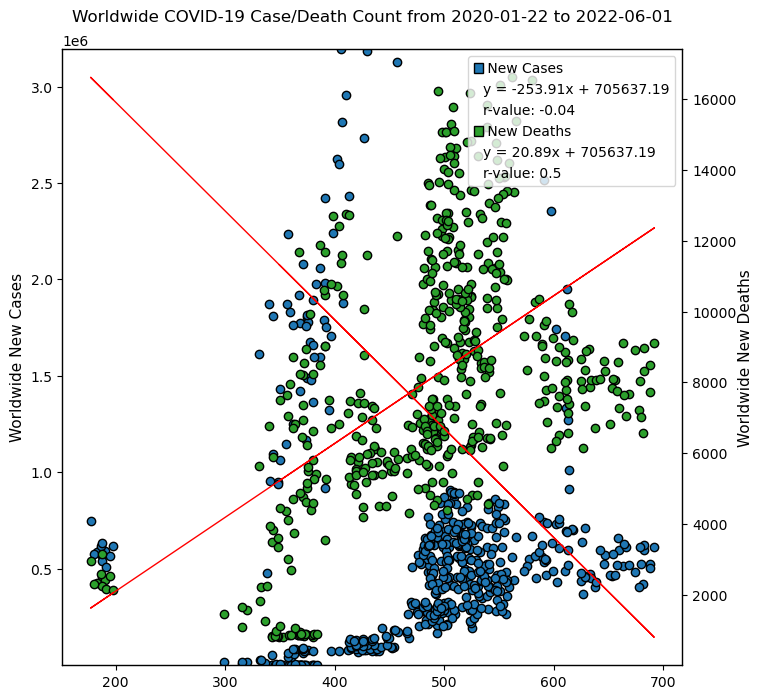

In [183]:
Scatterind2('2020-01-22', '2022-06-01',"Close", "New Cases", "New Deaths", "RSIin")

In [184]:
stock_cases_ADX= stock_cases[(stock_cases["rsi"] <= 30) |\
                             (stock_cases["rsi"] >= 70) &\
                             (stock_cases["Date"] > '2020-01-22')&\
                            (stock_cases["Date"] < '2022-06-01')]\
                            [['Date','rsi','Close',"New Cases",'New Deaths']]
stock_cases_ADX

Date        rsi       Close  New Cases  New Deaths
136  2019-07-18  26.947416  325.209991        0.0         0.0
137  2019-07-19  24.093599  315.100006        0.0         0.0
138  2019-07-22  22.934527  310.619995        0.0         0.0
139  2019-07-23  22.086556  307.299988        0.0         0.0
182  2019-09-23  28.228494  265.920013        0.0         0.0
..          ...        ...         ...        ...         ...
843  2022-05-06  22.790522  180.970001   617853.0      2123.0
844  2022-05-09  21.649933  173.100006   713944.0      1909.0
845  2022-05-10  24.022586  177.660004   630907.0      2010.0
846  2022-05-11  22.227829  166.369995   686471.0      2201.0
847  2022-05-12  26.392850  174.309998   632814.0      1951.0

[73 rows x 5 columns]

In [185]:
Scatterind2('2020-01-22', '2022-06-01',"Close", "New Cases", "New Deaths", "RSIout")

New Cases: The r-value is 0.15 and The p-value is 0.147
New Deaths: The r-value is 0.7 and The p-value is 0.704


In [63]:
plt.figure(figsize=(20,10))
# If plt.figure does not change the size, try placing it before plt.plot!

plt.bar(stock_cases['Date'], stock_cases['Volume'], color = 'green')
plt.xticks(np.arange(0, len(stock_cases['Date']), 50), rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlim(0, 598)
plt.xlabel('Date (yyyy-mm-dd)')
plt.ylabel('Volume')
plt.title('Netflix Closing Prices from 2019-01-22 to 2022-06-03')
plt.show()